### Analyze the calibrate mode results for TRACERx patients to find the parsimony weights that best align with the genetic distance scores

In [1]:
import os
import pickle
from src.util import eval_util as eutil

REPO_DIR = os.path.join(os.getcwd(), "../../")
os.chdir(REPO_DIR)


CUDA GPU: False


In [2]:
PARAMS = "calibrate_wip_solvepoly_3,2,1,1,1_1,1,1,2,3_12042023"
METIENT_OUTPUT_DIR = os.path.join(REPO_DIR, 'src/data/tracerx_nsclc/metient_outputs')
CONIPHER_OUTPUT_DIR = os.path.join(METIENT_OUTPUT_DIR, f'pyclone_clustered_conipher_trees_{PARAMS}')
TRACERX_DATA_DIR = os.path.join(REPO_DIR, "src/data/tracerx_nsclc/")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_seaborn_bar_chart(data_dict):
    fig = plt.figure(figsize=(3, 4),dpi=200)
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    keys = list(data_dict.keys())
    sorted_keys = sorted(keys, key=lambda x: x[0], reverse=True)
    string_keys = [str((k)) for k in sorted_keys]
    values = [-1*data_dict[k].item() for k in sorted_keys]
    print(keys, string_keys, values)
    snsfig = sns.barplot(x=string_keys, y=values, palette=sns.color_palette("muted"),order=string_keys)
    snsfig.spines['top'].set_visible(False)
    snsfig.spines['right'].set_visible(False)

    #plt.title()
    plt.xlabel("theta: (migration weight, seeding site weight)", fontsize=7.5)
    plt.ylabel("-E(theta)", fontsize=10)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)
    plt.ylim(min(values)-5, max(values)+5)
    fig.savefig(os.path.join(REPO_DIR, "src/test/output_plots/tracerx", f"cross_ent_{PARAMS}.png"), dpi=600, bbox_inches='tight', pad_inches=0.5) 

    plt.show()
    plt.close()

unique weights {(0.9, 0.1, 0.8), (0.25, 0.75, 0.8), (0.1, 0.9, 0.8), (0.75, 0.25, 0.8), (0.5, 0.5, 0.8)}
total patients 250
BEST THETA (0.5, 0.5, 0.8) BEST CROSS ENT tensor(-45.9218)
all_theta_to_cross_ent_sum {(0.9, 0.1, 0.8): tensor(-46.1133), (0.25, 0.75, 0.8): tensor(-46.1849), (0.1, 0.9, 0.8): tensor(-46.4717), (0.75, 0.25, 0.8): tensor(-45.9581), (0.5, 0.5, 0.8): tensor(-45.9218)}
[(0.9, 0.1, 0.8), (0.25, 0.75, 0.8), (0.1, 0.9, 0.8), (0.75, 0.25, 0.8), (0.5, 0.5, 0.8)] ['(0.9, 0.1, 0.8)', '(0.75, 0.25, 0.8)', '(0.5, 0.5, 0.8)', '(0.25, 0.75, 0.8)', '(0.1, 0.9, 0.8)'] [46.11330795288086, 45.95808792114258, 45.92182159423828, 46.1849479675293, 46.471736907958984]


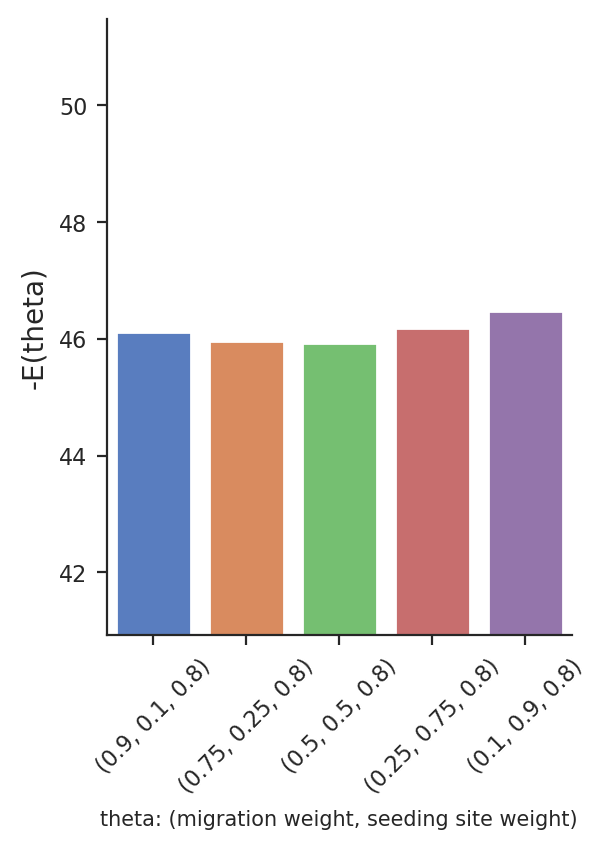

In [8]:
unique_weights = [(0.9, 0.1, 0.8), (0.75, 0.25, 0.8), (0.5, 0.5, 0.8), (0.25, 0.75, 0.8), (0.1, 0.9, 0.8)]

best_theta, best_cross_ent, all_theta_to_cross_ent_sum = eutil.get_argmax_cross_ent_thetas(pickle_file_dirs=[os.path.join(CONIPHER_OUTPUT_DIR, 'max_pars_genetic_distance')], weights=unique_weights)

print("BEST THETA", best_theta, "BEST CROSS ENT", best_cross_ent)
print("all_theta_to_cross_ent_sum", all_theta_to_cross_ent_sum)
plot_seaborn_bar_chart(all_theta_to_cross_ent_sum)